In [1]:
%cd ../..

c:\Boyko Boev\Stock-Market-Prediction\src


In [2]:
from lstm_model import build_model, train_model, save_lstm_model, load_lstm_model
from models.lstm_v2.lstm_normalize import get_lstm_data
from utils.chart import config_chart, plot_model_performance, plot_scatter_data, plot_distribution_data, plot_direction_comparison
from constants import SP500_TICKER
# import tensorflow as tf


---

## For **build_model** function

In [3]:
model = build_model()
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 64)                  │          18,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,801 (81.25 KB)

 Trainable params: 20,801 (81.25 KB)

 Non-trainable params: 0 (0.00 B)

---

## For **train_model** function

In [4]:
train, test, predict= get_lstm_data(SP500_TICKER)

x_train = train["x"] 
y_train = train["y"]

x_test = test["x"]
y_test = test["y"]

x_predict = predict["x"]
y_predict = predict["y"]


print("Train data:")
print(x_train[0])
print(x_train.shape)
print(y_train[0])
print(y_train.shape)

print("Test data:")
print(y_test[0])
print(x_test.shape)
print(x_test[0])
print(x_test.shape)

print("Predict data:")
print(x_predict[0])
print(x_predict.shape)
print(y_predict[0])
print(y_predict.shape)

Train data:
[[0.166 0.161 0.42  0.414 0.684 0.661]]
(4806, 1, 6)
1.0
(4806,)
Test data:
0.0
(601, 1, 6)
[[0.525 0.531 0.58  0.813 0.774 0.785]]
(601, 1, 6)
Predict data:
[[0.903 0.898 0.435 0.568 0.724 0.755]]
(601, 1, 6)
0.0
(601,)


In [5]:
# plt = config_chart('Model Data')
# plt.plot(y_dates_train[:, 0], y_train[:, 0])
# plt.plot(y_dates_test[:, 0], y_test[:, 0])
# plt.plot(y_dates_predict[:, 0], y_predict[:, 0])
# plt.legend(['Train', 'Test','Predict'])

Epoch 1/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5021 - loss: 0.6929 - precision_1: 0.5131 - recall_1: 0.8598
Epoch 2/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5321 - loss: 0.6914 - precision_1: 0.5321 - recall_1: 1.0000
Epoch 3/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5283 - loss: 0.6918 - precision_1: 0.5283 - recall_1: 1.0000
Epoch 4/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5337 - loss: 0.6911 - precision_1: 0.5337 - recall_1: 1.0000
Epoch 5/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5370 - loss: 0.6906 - precision_1: 0.5370 - recall_1: 1.0000
Epoch 6/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5310 - loss: 0.6914 - precision_1: 0.5310 - recall_1: 1.0000
Epoch 7/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5323 - loss: 0.6913 - precision_1: 0.5323 - recall_1: 1.0000
Epoch 8/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5246 - loss: 0.6923 - precision_1: 0.

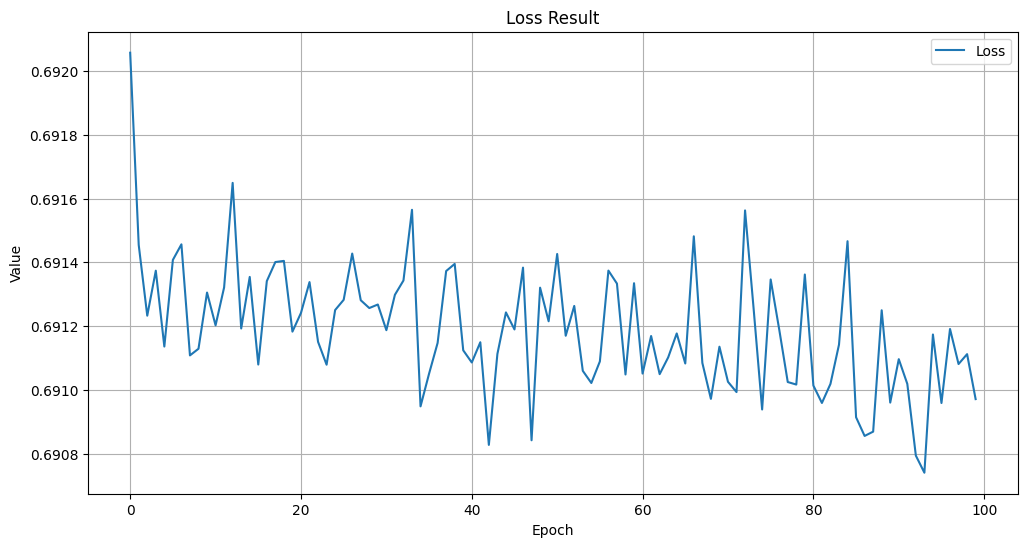

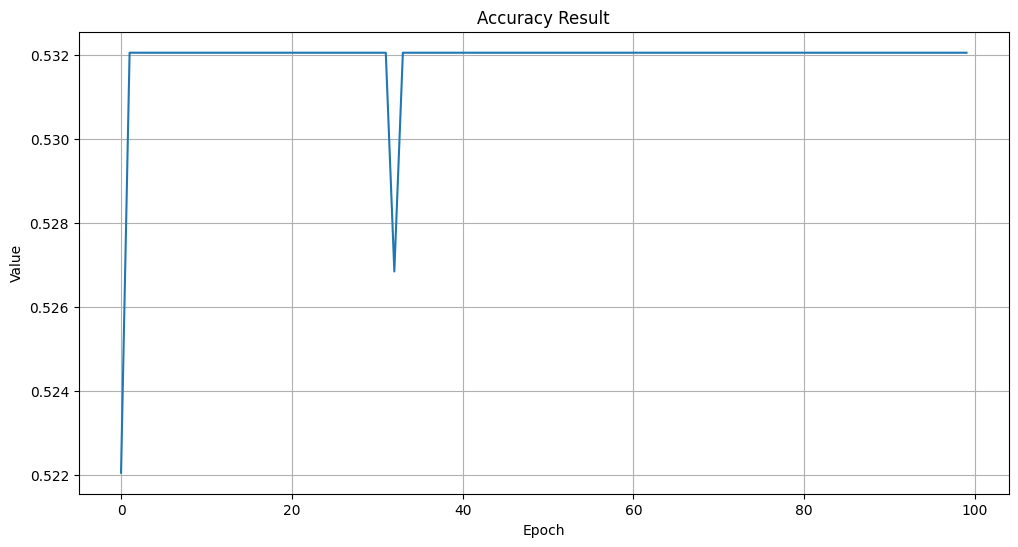

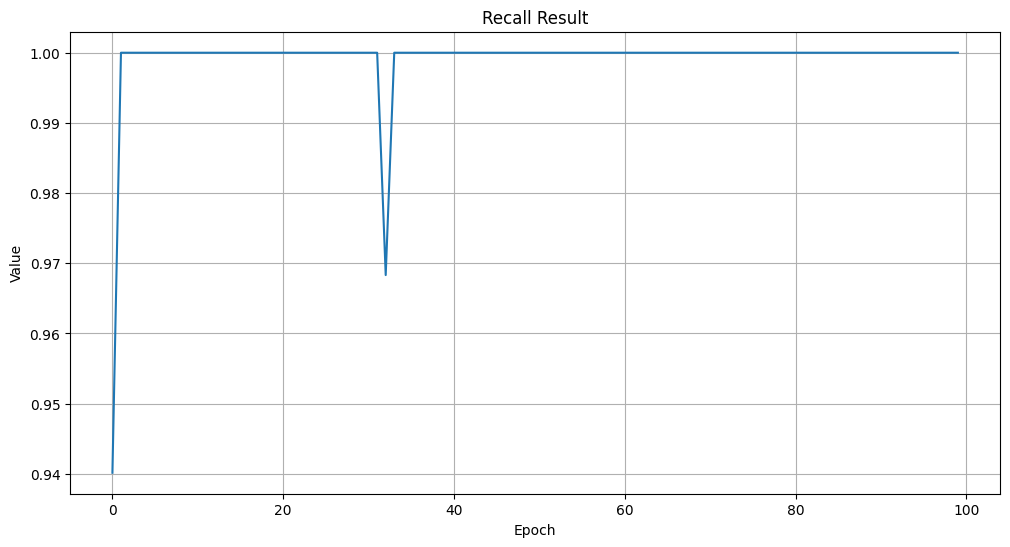

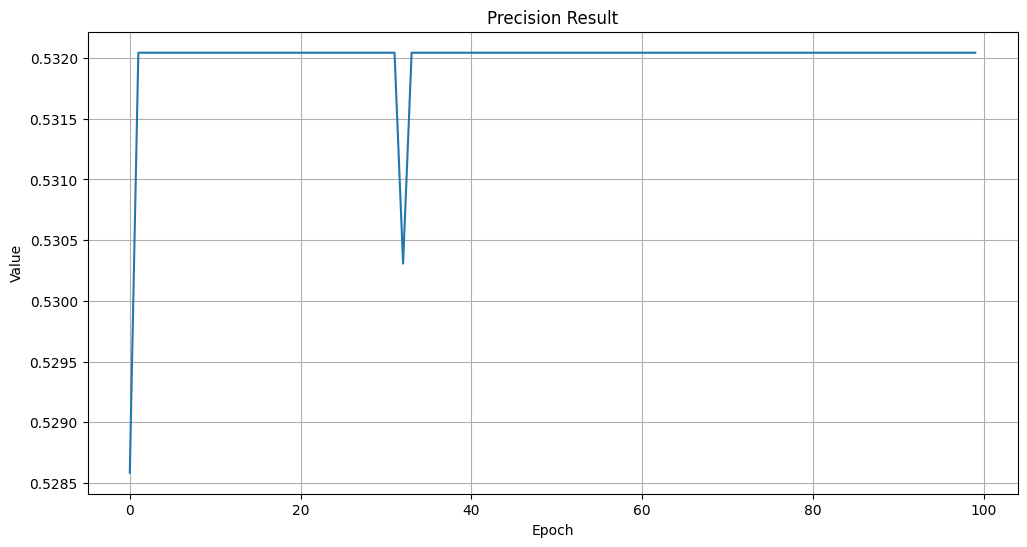

Train result:
Test result:
[0.6876438856124878, 0.5640599131584167, 0.5640599131584167, 1.0]


In [6]:
model, fit_result, evaluate_result = train_model(x_train, x_test, y_train, y_test) 

plot_model_performance(fit_result)
# plot_model_performance(evaluate_result)

print("Train result:")
print(fit_result)

print("Test result:")
print(evaluate_result)

save_lstm_model(model)

In [7]:
latest_train_metrics = [value[-1] for key, value in fit_result.history.items()]

print("Train result:")
print("accuracy, loss, precision, recall")
print(latest_train_metrics)

print("Test result:")
print("loss, accuracy, precision, recall")
print(evaluate_result)

Train result:
accuracy, loss, precision, recall
[0.5320432782173157, 0.6909714341163635, 0.5320432782173157, 1.0]
Test result:
loss, accuracy, precision, recall
[0.6876438856124878, 0.5640599131584167, 0.5640599131584167, 1.0]


In [8]:
model = load_lstm_model()

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


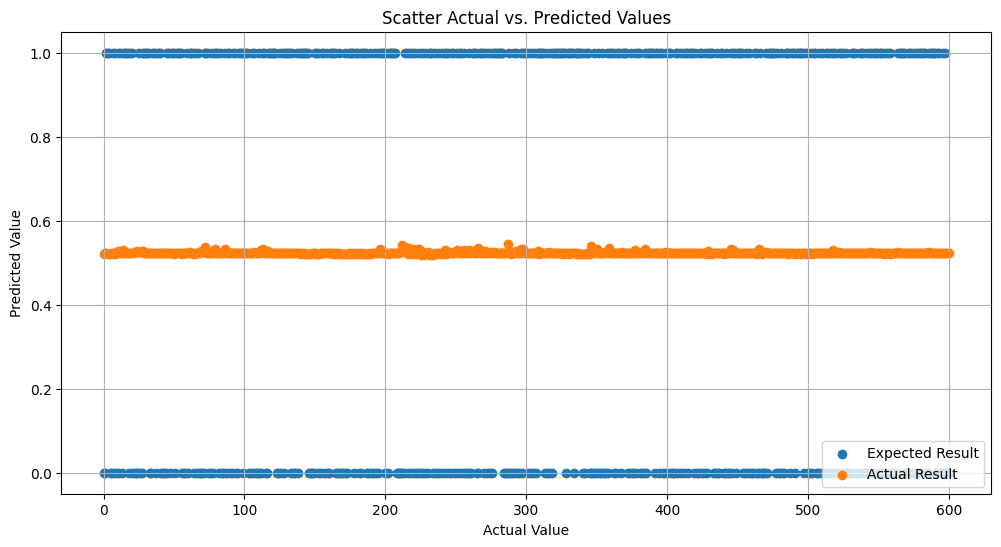

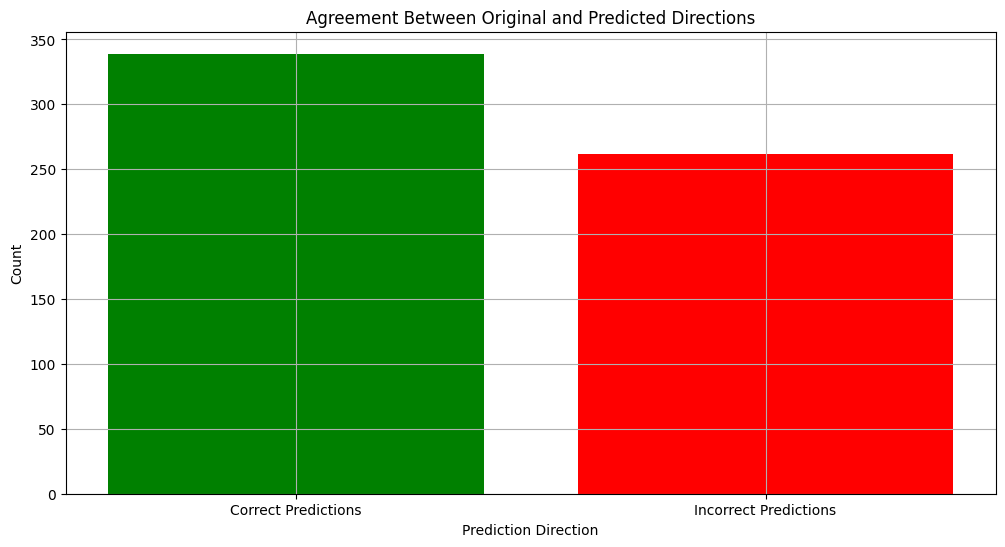

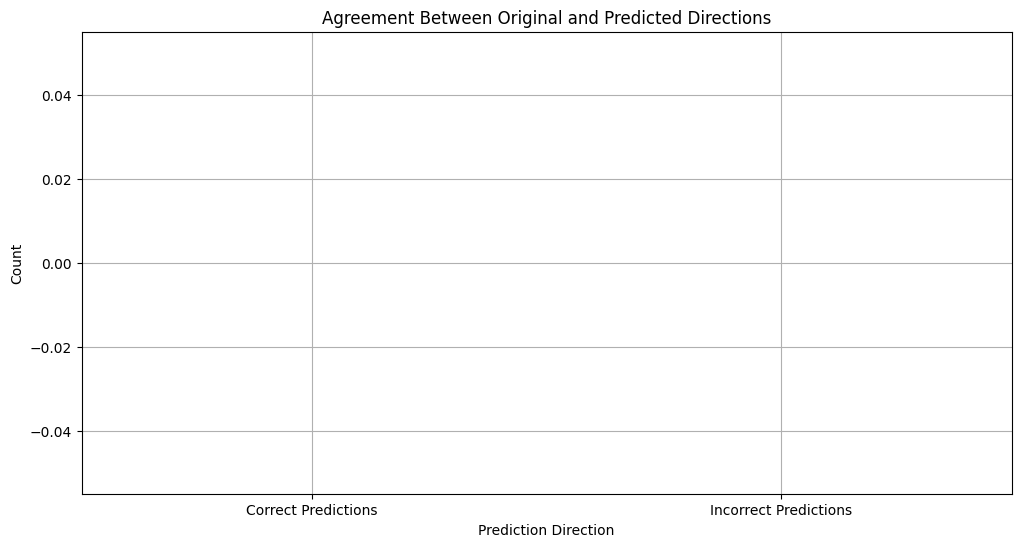

In [9]:
predictions_test = model.predict(x_test)

plot_scatter_data(y_test, predictions_test)
plot_direction_comparison(y_test, predictions_test)


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


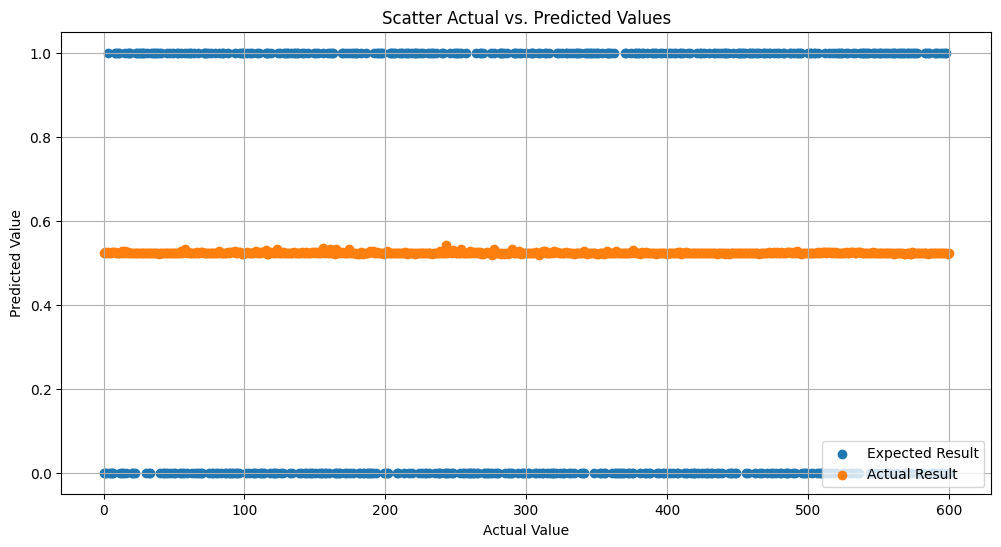

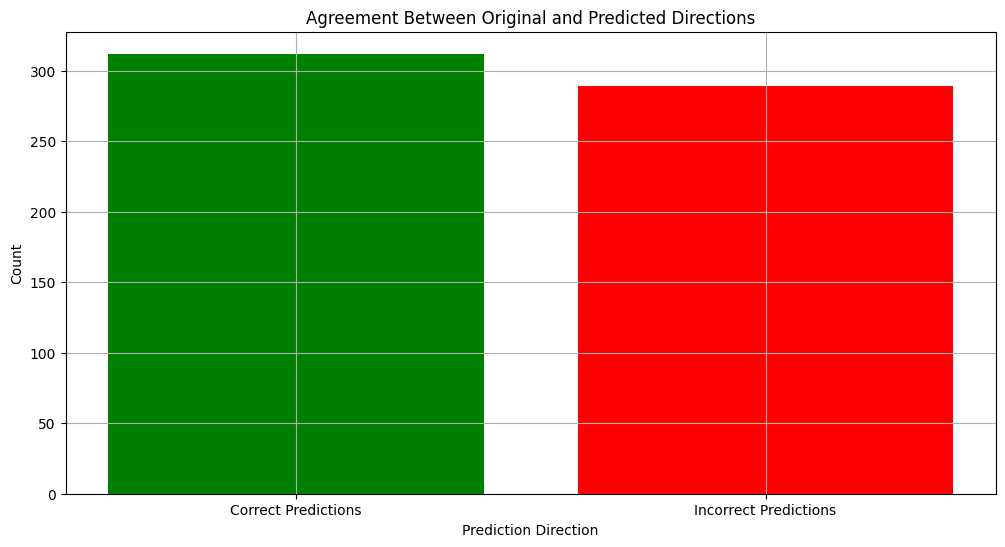

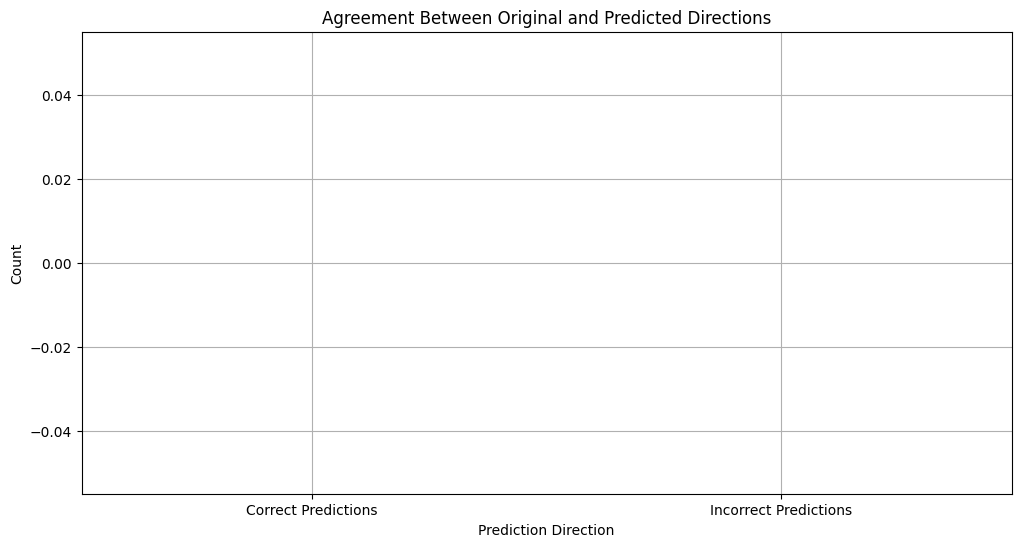

In [10]:
predictions = model.predict(x_predict)

# plt = config_chart('Predictions First Day Close Price')
# plt.plot(y_dates_predict[:, 0], y_predict[:, 0])
# plt.plot(y_dates_predict[:, 0], predictions[:, 0])
# plt.legend(['Data', 'Predictions'])
# model
plot_scatter_data(y_predict, predictions)
plot_direction_comparison(y_predict, predictions)